In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from sqlalchemy import create_engine
# from matplotlib.patches import Polygon
from pybaseball.plotting import spraychart

In [4]:
sqlite_file = '../../wisd_data.db'

In [5]:
engine = create_engine(f'sqlite:///{sqlite_file}')

# Read data from SQLite database
pitch_df = pd.read_sql('pitch_data', engine)
hit_df = pd.read_sql('hit_data', engine)
score_df = pd.read_sql('score_data', engine)
events_df = pd.read_sql('events_data', engine)
ball_samples_df = pd.read_sql('ball_samples_data', engine)
bat_samples_df = pd.read_sql('bat_samples_data', engine)


score_df['runs_innings_team1'] = score_df['runs_innings_team1'].apply(ast.literal_eval)
score_df['inning'] = score_df['runs_innings_team1'].apply(lambda x: len(x))

def get_inning(pitch_eventId):
    return score_df[score_df['pitch_eventId'] == pitch_eventId]['inning'].values[0]

events_df['inning'] = events_df['pitch_eventId'].apply(lambda x: get_inning(x))

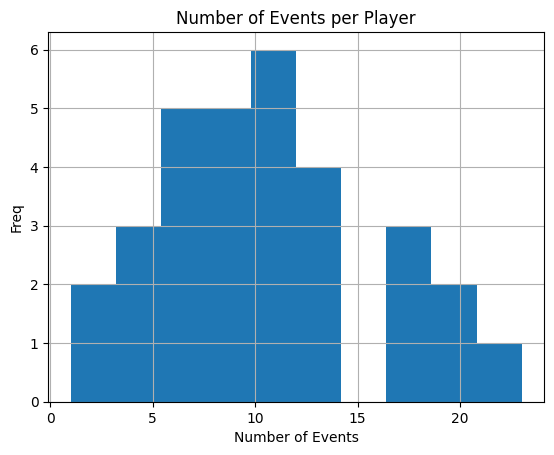

In [46]:
plt.figure()
events_df.value_counts('personId_mlbId').hist()
plt.xlabel('Number of Events')
plt.ylabel('Freq')
plt.title('Number of Events per Player')
plt.show()

In [99]:
len(np.unique(events_df['personId_mlbId']))

31

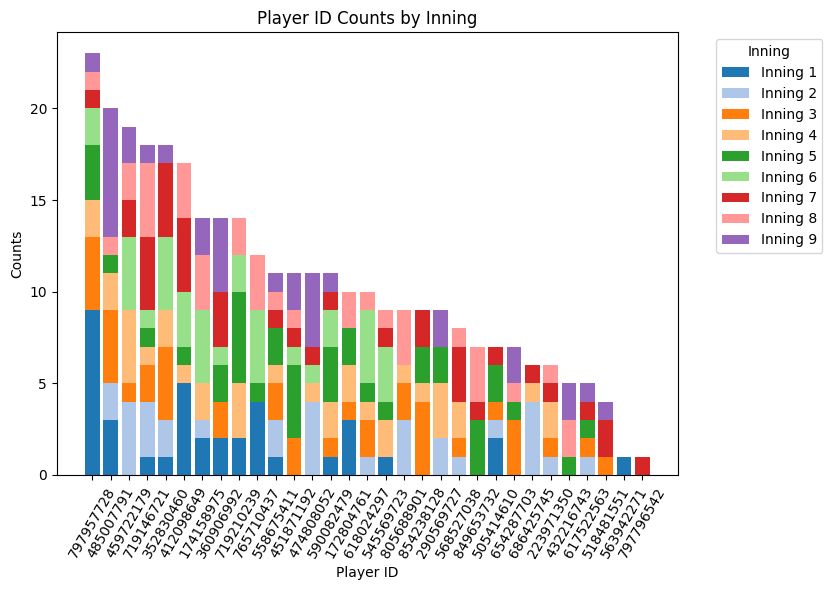

In [97]:
# Get unique innings and reverse sort them
unique_innings = sorted(events_df['inning'].unique(), reverse=False)
colors = plt.get_cmap('tab20')  # Using 'tab10' colormap

# Calculate the counts for each team per inning
team_inning_counts = events_df.groupby(['personId_mlbId', 'inning']).size().unstack(fill_value=0)

# Calculate total events for each player and sort by this total
total_events = team_inning_counts.sum(axis=1)
sorted_team_inning_counts = team_inning_counts.loc[total_events.sort_values(ascending=False).index]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each inning as stacked bars
bottom = np.zeros(len(sorted_team_inning_counts))
for i, inning in enumerate(unique_innings):
    ax.bar(
        [str(x) for x in sorted_team_inning_counts.index],
        sorted_team_inning_counts[inning],
        bottom=bottom,
        color=colors(i),
        label=f'Inning {inning}'
    )
    bottom += sorted_team_inning_counts[inning].values

# Customize the plot
plt.title('Player ID Counts by Inning')
plt.xlabel('Player ID')
plt.ylabel('Counts')
plt.xticks(rotation=60)
# Move the legend outside of the plot
plt.legend(title='Inning', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

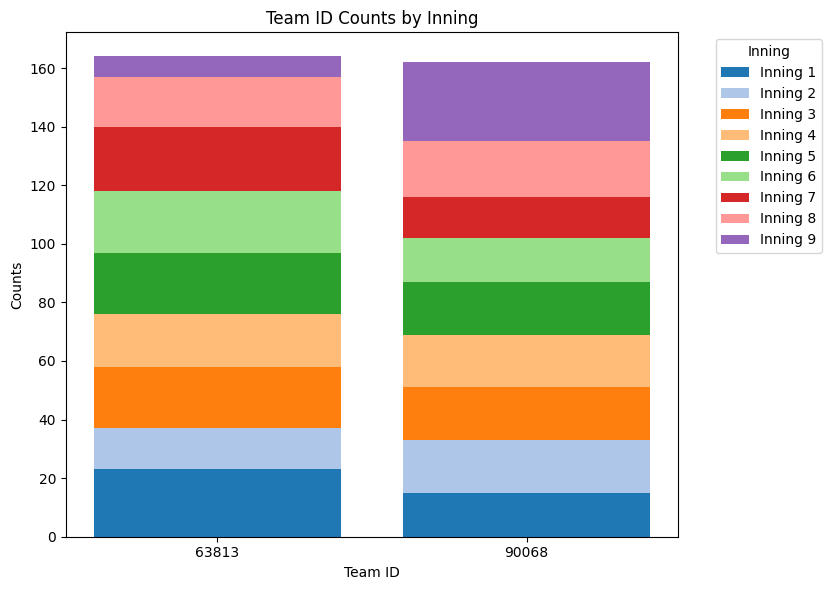

In [90]:
# Get unique innings and reverse sort them
unique_innings = sorted(events_df['inning'].unique(), reverse=False)
colors = plt.get_cmap('tab20')  # Using 'tab10' colormap

# Calculate the counts for each team per inning
team_inning_counts = events_df.groupby(['teamId_mlbId', 'inning']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each inning as stacked bars
bottom = np.zeros(len(team_inning_counts))
for i, inning in enumerate(unique_innings):
    ax.bar([str(x) for x in team_inning_counts.index], team_inning_counts[inning], bottom=bottom, color=colors(i), label=f'Inning {inning}')
    # ax.bar(team_inning_counts.index, team_inning_counts[inning], bottom=bottom, color=colors(i), label=f'Inning {inning}')
    bottom += team_inning_counts[inning].values

# Customize the plot
plt.title('Team ID Counts by Inning')
plt.xlabel('Team ID')
plt.ylabel('Counts')
plt.xticks(rotation=0)
# Move the legend outside of the plot
plt.legend(title='Inning', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [55]:
events_df

,pitch_eventId,hit_eventId,eventId,type,angle_x,angle_y,teamId_mlbId,personId_mlbId,inning
0,b120cf14-305c-442c-a739-c499bf61eec8,22560b81-5e95-4221-9036-60b1b20ca497,22560b81-5e95-4221-9036-60b1b20ca497,Hit,-4.518026,25.228142,63813,617522563,9
1,b9c8012d-2cee-4ba8-aea9-a1fec00d617f,f5d3b509-92c9-4ecc-9e97-9ba475f21939,f5d3b509-92c9-4ecc-9e97-9ba475f21939,Hit,43.907639,-8.853068,63813,590082479,9
2,4d532808-44f5-4912-a905-9813ddcff65e,260e8f92-3469-483c-91d3-03417ee3d35e,260e8f92-3469-483c-91d3-03417ee3d35e,Hit,-109.679434,59.292307,90068,765710437,6
3,ee70196b-875e-4589-8d3e-7ab6b9437a7c,c8da40a7-b783-4111-bfb4-cb1787d0a6ec,c8da40a7-b783-4111-bfb4-cb1787d0a6ec,Hit,-11.464767,36.443691,90068,360906992,6
4,eac73a5a-daa8-47dd-bc03-ae12d53455b4,49dbbf90-93de-48c3-ac45-be1525e29a15,49dbbf90-93de-48c3-ac45-be1525e29a15,Hit,13.598536,14.225456,90068,451871192,9
...,...,...,...,...,...,...,...,...,...
321,71ba8d9d-efba-4a8b-b475-e9d13fc4384d,cb6193f0-5786-4db0-bab2-5488306d99c4,cb6193f0-5786-4db0-bab2-5488306d99c4,Hit,51.386655,3.760452,63813,174158975,1
322,52035229-99ce-4e9c-a697-994fe63afde6,f34c0fdc-48b9-433c-afa6-525cdd1c07f9,f34c0fdc-48b9-433c-afa6-525cdd1c07f9,Hit,12.465086,-20.945674,90068,485007791,9
323,34774b88-1078-4ebb-a606-a1a2d4d8afd1,4ac44bfc-ca74-4805-99e1-1928cd9eeee1,4ac44bfc-ca74-4805-99e1-1928cd9eeee1,Hit,-4.836557,-8.228676,63813,797957728,5
324,a278f2bc-a22a-40a0-86e5-ec37075426de,e522f927-c72f-49cb-94a3-23c3147f731e,e522f927-c72f-49cb-94a3-23c3147f731e,Hit,-44.676387,0.017764,90068,719146721,2


In [35]:
# score_df['runs_innings_team1'] = score_df['runs_innings_team1'].apply(ast.literal_eval)

# Filter rows where the length of the list is at least 9
filtered_df = score_df[score_df['runs_innings_team1'].apply(len) >= 9]

# Extract the first 8 elements for grouping
filtered_df['first_8_elements'] = filtered_df['runs_innings_team1'].apply(lambda x: tuple(x[:8]))

# Group by the first 8 elements
for grp, grp_df in filtered_df.groupby('first_8_elements'):
    pass

/var/folders/bz/nyjmxgt15ssg9jw35fx1xd400000gp/T/ipykernel_81369/2363025500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['first_8_elements'] = filtered_df['runs_innings_team1'].apply(lambda x: tuple(x[:8]))
